#Project Name- Airline Passeneger Referral Prediction
##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 - Tanisha Goyal**

##**Introduction**:
The Airline passenger Referral system has become the most important criteria globally for the airline industry in order to address the surge which has been created after global pandemic so as to remain in the global market competition.
Airline referral system generally works on customer reviews which is basically sentiment given by the customer depending upon various factor like seat comfort, their trip distance, route they have travelled, timing, the airline frequency, ground service etc. on the basis of which sentiment reviews are analysed and machine learning model on classification is prepared which helps airline industries to focus on the factor resolving which it can actually help them in business growth better than the competitors


##**Problem Statement**:
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

##**Data descriptions:**


*   **airline**: Name of the airline.

*   **overall**: Overall point is given to the trip between 1 to 10.


*   **author**: Author of the trip


*   **reviewdate**: Date of the Review customer review: Review of the customers in free text format



*  **aircraft**: Type of the aircraft

*   **travellertype**: Type of traveler (e.g. business, leisure)


*   **cabin**: Cabin at the flight date flown: Flight date

*  **seatcomfort**: Rated between 1-5


*   **cabin service**: Rated between 1-5

*   **foodbev**: Rated between 1-5 entertainment: Rated between 1-5


*   **groundservice**: Rated between 1-5

*   **valueformoney**: Rated between 1-5





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/data_airline_reviews.xlsx')
df.T

,0,1,2,3,4,5,6,7,8,9,...,131885,131886,131887,131888,131889,131890,131891,131892,131893,131894
airline,NaN,Turkish Airlines,NaN,Turkish Airlines,NaN,Turkish Airlines,NaN,Turkish Airlines,NaN,Turkish Airlines,...,NaN,Ukraine International,NaN,Ukraine International,NaN,Ukraine International,NaN,Ukraine International,NaN,Ukraine International
overall,NaN,7.0,NaN,2.0,NaN,3.0,NaN,10.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,NaN,Christopher Hackley,NaN,Adriana Pisoi,NaN,M Galerko,NaN,Zeshan Shah,NaN,Pooja Jain,...,NaN,Yevheniy Kahanovych,NaN,Helen Lee,NaN,Andriy Yesypenko,NaN,Volodya Bilotkach,NaN,Kasper Hettinga
review_date,NaN,8th May 2019,NaN,7th May 2019,NaN,7th May 2019,NaN,6th May 2019,NaN,6th May 2019,...,NaN,21st January 2007,NaN,15th December 2006,NaN,19th May 2006,NaN,29th April 2006,NaN,10th February 2006
customer_review,NaN,âœ… Trip Verified | London to Izmir via Istanb...,NaN,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,âœ… Trip Verified | Flew on Turkish Airlines I...,NaN,âœ… Trip Verified | Mumbai to Dublin via Istan...,...,NaN,Two domestic flights between Kiev and Lviv las...,NaN,I had a good flight from London to Kiev with U...,NaN,Kiev - London (Gatwick) in business class (in ...,NaN,Several flights - KBP to AMS (3 times one way)...,NaN,KBP-AMS with UIA. Although it was a relatively...
aircraft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A330,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,NaN,Business,NaN,Family Leisure,NaN,Business,NaN,Solo Leisure,NaN,Solo Leisure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,NaN,Economy Class,NaN,Economy Class,NaN,Economy Class,NaN,Economy Class,NaN,Economy Class,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,NaN,London to Izmir via Istanbul,NaN,Istanbul to Bucharest,NaN,Rome to Prishtina via Istanbul,NaN,Washington Dulles to Karachi,NaN,Mumbai to Dublin via Istanbul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_flown,NaN,2019-05-01 00:00:00,NaN,2019-05-01 00:00:00,NaN,2019-05-01 00:00:00,NaN,April 2019,NaN,2019-05-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
airline,NaN,Turkish Airlines,NaN,Turkish Airlines,NaN,Turkish Airlines,NaN,Turkish Airlines,NaN,Turkish Airlines
overall,NaN,7.0,NaN,2.0,NaN,3.0,NaN,10.0,NaN,1.0
author,NaN,Christopher Hackley,NaN,Adriana Pisoi,NaN,M Galerko,NaN,Zeshan Shah,NaN,Pooja Jain
review_date,NaN,8th May 2019,NaN,7th May 2019,NaN,7th May 2019,NaN,6th May 2019,NaN,6th May 2019
customer_review,NaN,âœ… Trip Verified | London to Izmir via Istanb...,NaN,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,âœ… Trip Verified | Flew on Turkish Airlines I...,NaN,âœ… Trip Verified | Mumbai to Dublin via Istan...
aircraft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A330,NaN,NaN
traveller_type,NaN,Business,NaN,Family Leisure,NaN,Business,NaN,Solo Leisure,NaN,Solo Leisure
cabin,NaN,Economy Class,NaN,Economy Class,NaN,Economy Class,NaN,Economy Class,NaN,Economy Class
route,NaN,London to Izmir via Istanbul,NaN,Istanbul to Bucharest,NaN,Rome to Prishtina via Istanbul,NaN,Washington Dulles to Karachi,NaN,Mumbai to Dublin via Istanbul
date_flown,NaN,2019-05-01 00:00:00,NaN,2019-05-01 00:00:00,NaN,2019-05-01 00:00:00,NaN,April 2019,NaN,2019-05-01 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
df.isna().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [ ]:
df.dropna(how='all',inplace=True)
df.isna().sum()

airline                0
overall             1930
author                 0
review_date            0
customer_review        0
aircraft           46229
traveller_type     26192
cabin               2644
route              26221
date_flown         26314
seat_comfort        5266
cabin_service       5232
food_bev           13339
entertainment      21754
ground_service     26589
value_for_money     1972
recommended         1507
dtype: int64

In [ ]:
df.duplicated().sum()

4764

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.isna().sum()



airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

<Axes: >

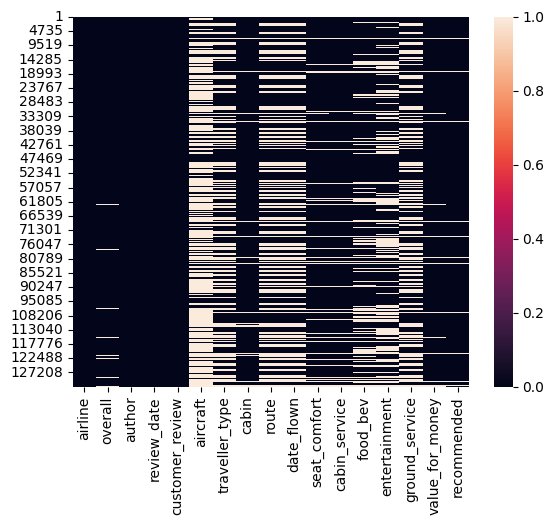

In [ ]:
#visualize the missing value
sns.heatmap(df.isnull())

In [ ]:
top6_airlines= df['aircraft'].value_counts().head(6)
top6_airlines

aircraft
A320              2130
A380              1109
Boeing 777        1101
Boeing 737-800    1021
A330               974
Boeing 787         833
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 6 Most Frequent Used Airlines')

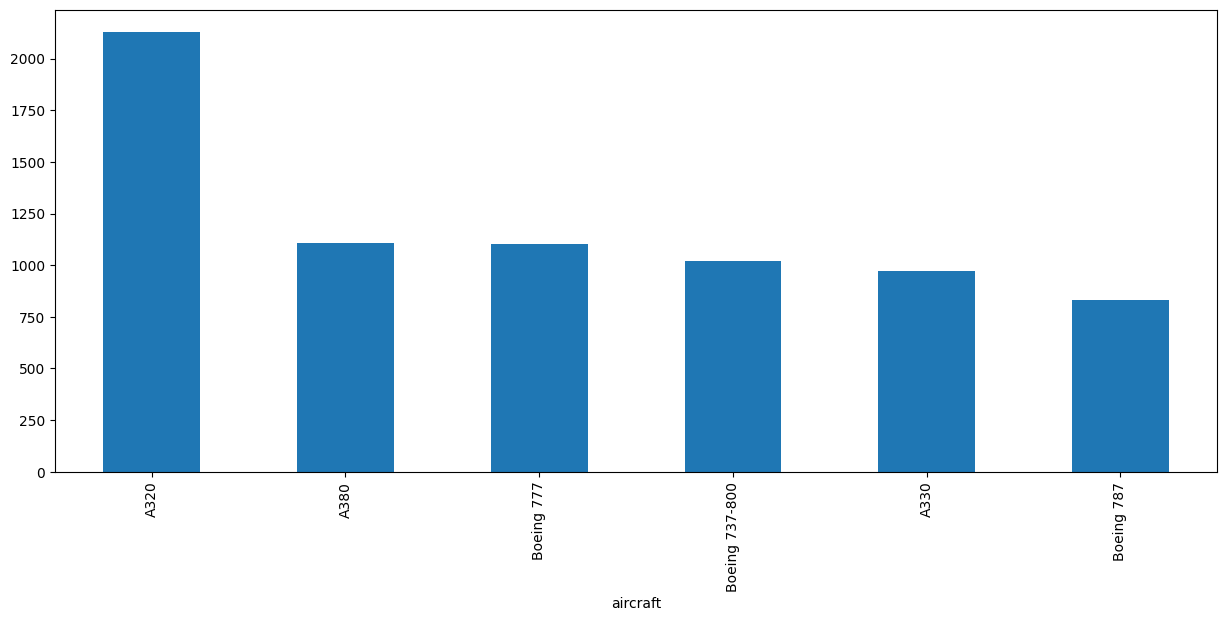

In [ ]:
#visualize top 6 most frequent used airlines
top6_airlines.plot(kind='bar',figsize=(15,6))
graph.set_title("Top 6 Most Frequent Used Airlines",fontsize=15,fontweight='bold')

<Axes: xlabel='aircraft'>

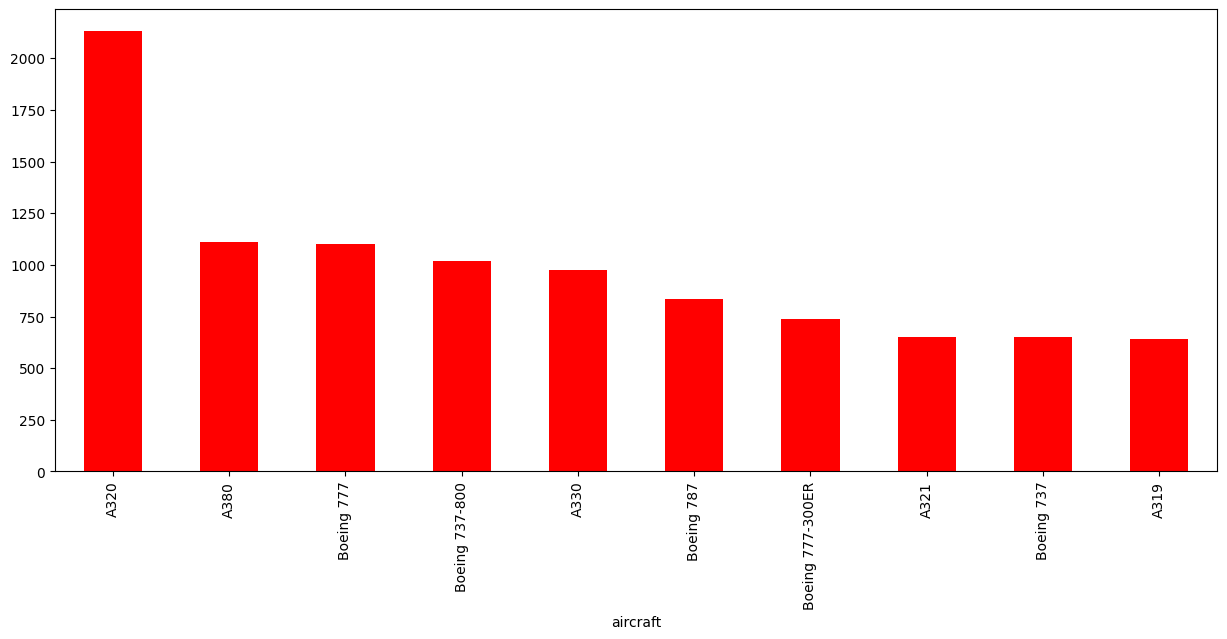

In [ ]:
#visualize top 10 most frequent used aircraft
top10_aircraft = df['aircraft'].value_counts()[0:10]

top10_aircraft.plot(kind='bar',figsize=(15,6),color='r')

<Axes: xlabel='count', ylabel='traveller_type'>

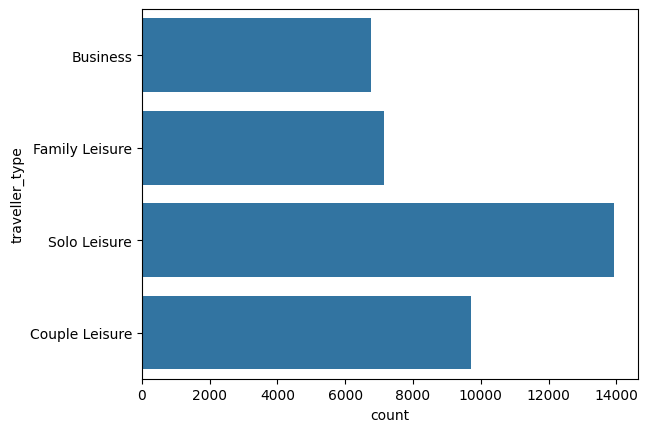

In [ ]:
sns.countplot(df['traveller_type'])

* We can see there are 4 classes present in Traveller type feature.
* Also we can notice that Solo Leisure has highest value count. From this we can conclude that most of people who travel through airline travels in solo. Followed by College then Family.
* Very small percentage of people prefer flying for business.

<Axes: ylabel='count'>

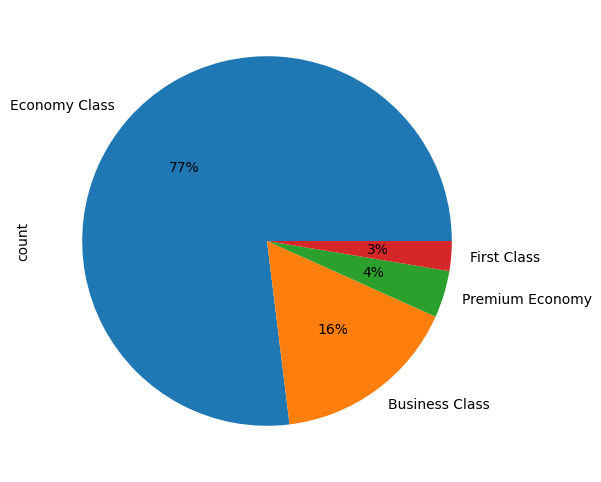

In [ ]:
df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(15,6))

<Axes: xlabel='recommended'>

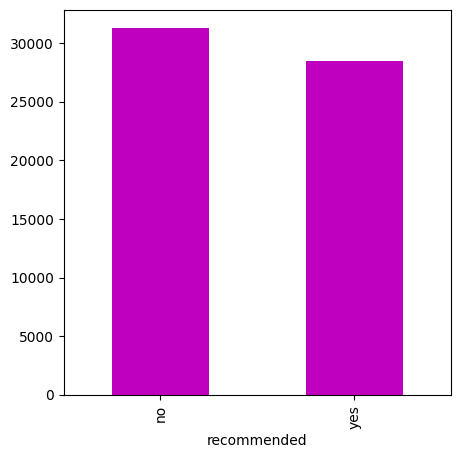

In [ ]:
plt.figure(figsize=(5,5))
df['recommended'].value_counts().plot(kind='bar',color='m')

In [ ]:
df['date_flown']=df['date_flown'].apply(lambda x:pd.to_datetime(x))
df['date_flown']
df['travel_month']=df['date_flown'].dt.month

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

<Axes: xlabel='travel_month'>

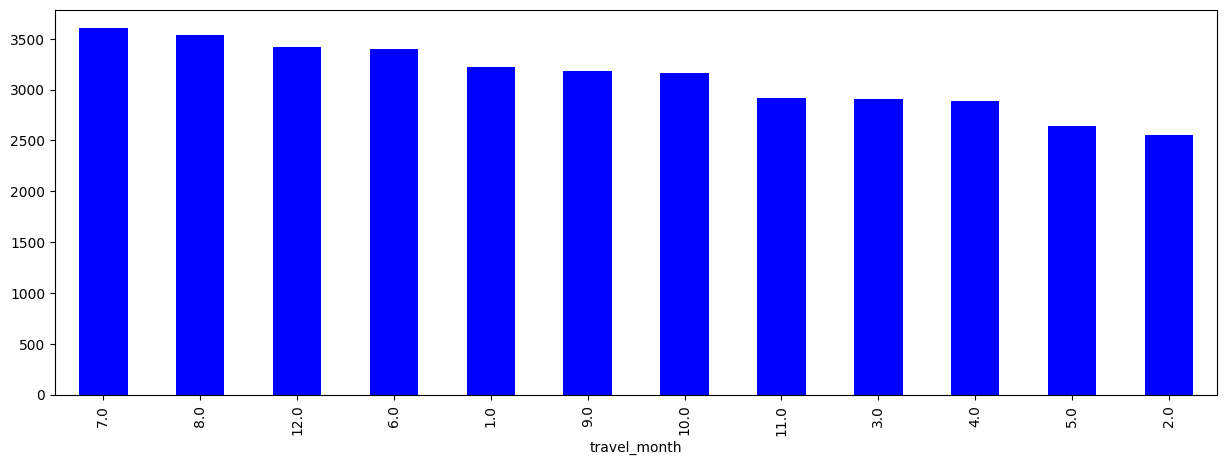

In [ ]:
df['travel_month'].value_counts().plot(kind='bar',figsize=(15,5),color='b')

we can see from the graph
* july month is most preferred by the airline travellers and february month has lowest travel frequency.
* We can also conclude that people tends to air travel more after june and from february to may they are not prefering air travel.

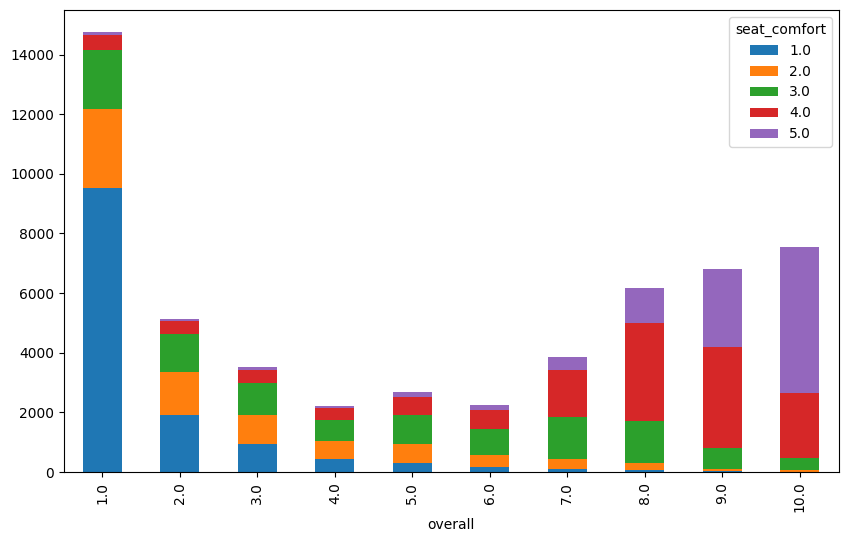

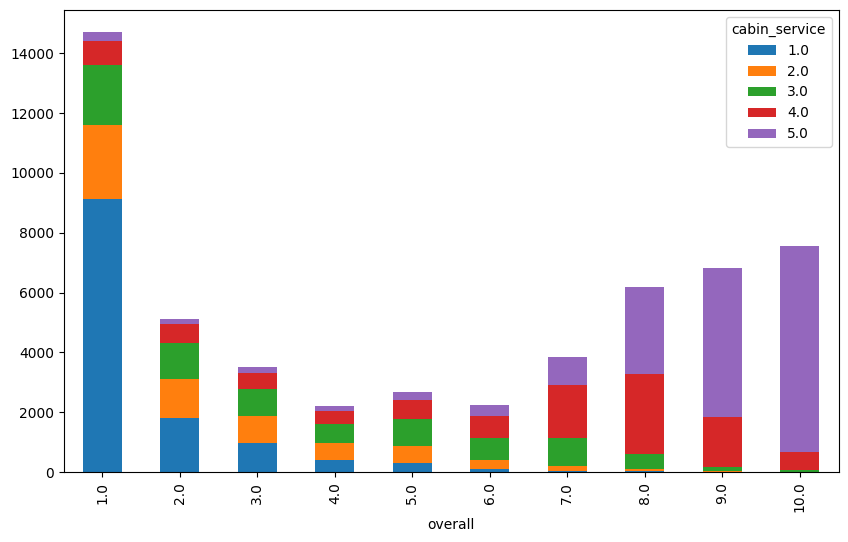

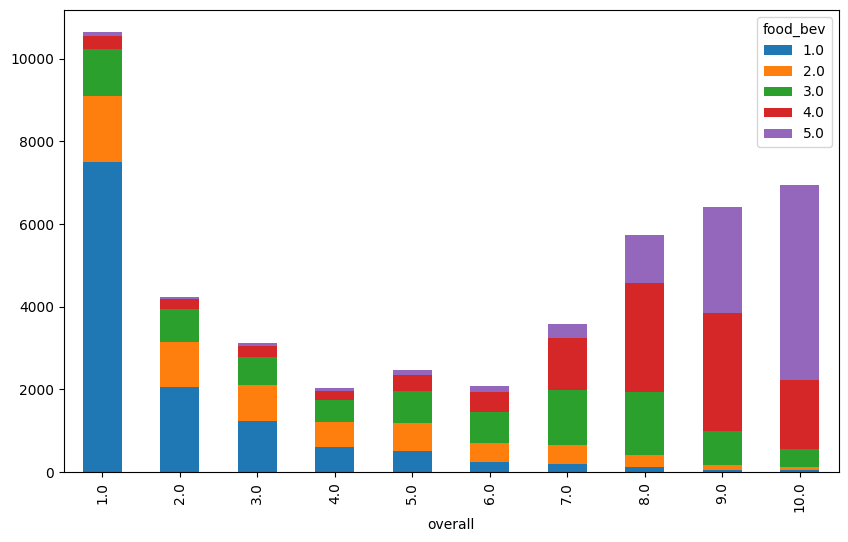

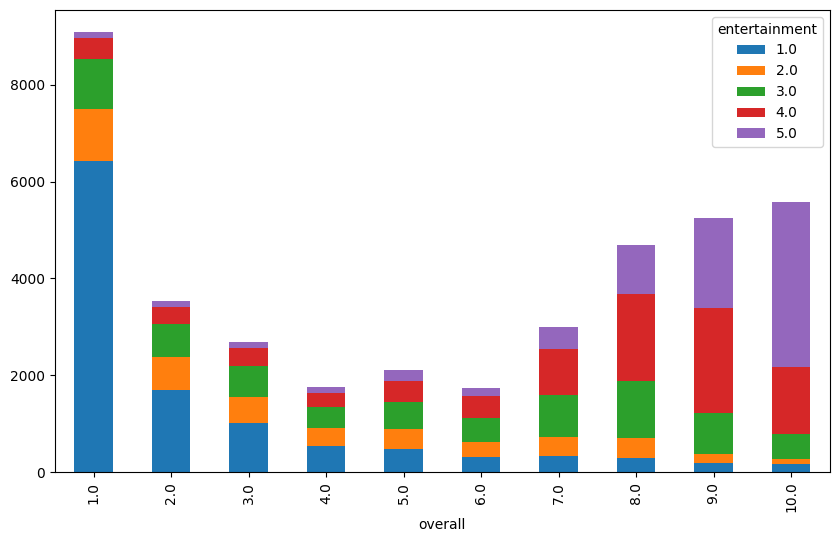

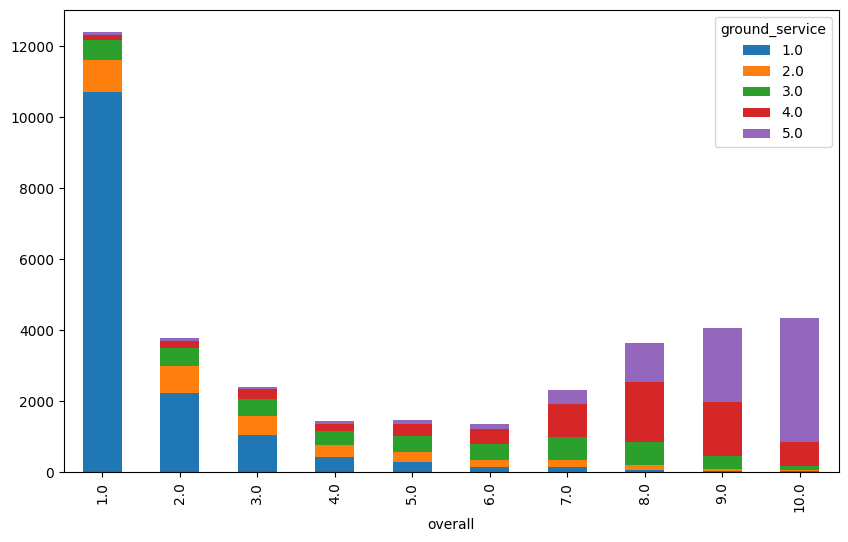

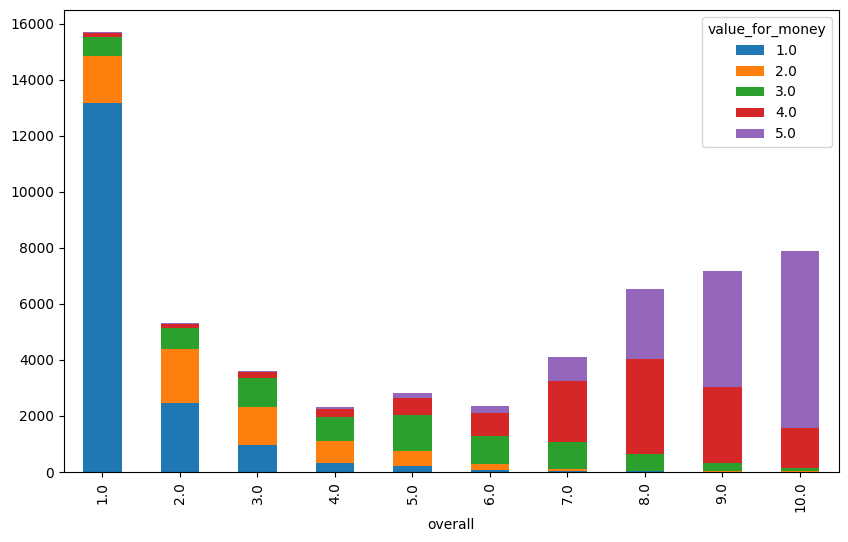

In [ ]:
#function for stacked plot for rating feature
def rating_features(r):
  x=df.groupby([df['overall']])
  x[r].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,6))

review_feat=['seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money']

#get stacked plot fro review feat
for r in review_feat:
  rating_features(r)

From Above graph we can conclude that
* when overall rating of airlines are good(10.0 or 9.0 in range of 10) then rating of all features like 'seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money' are high(5.0 or 4.0 mostly in range of 5).
* when overall rating of airlines are low(1.0,2.0 in range of 10) then in that case all review features ratings are also low.
* It suggests this review features ratings positiviley impacts overall rating of airlines and obviously it massively impacts airline businesses.

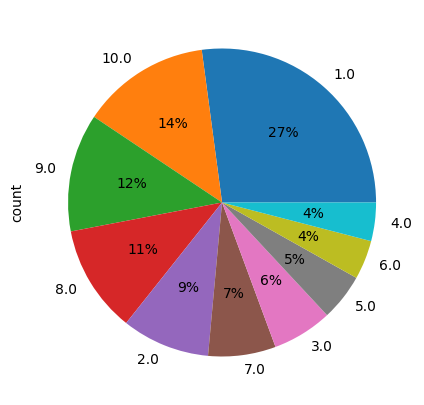

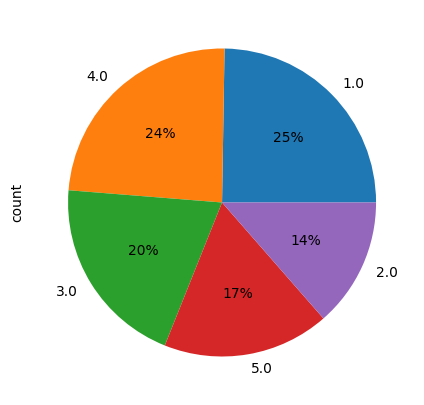

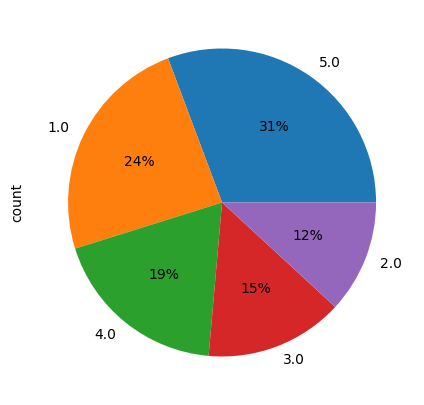

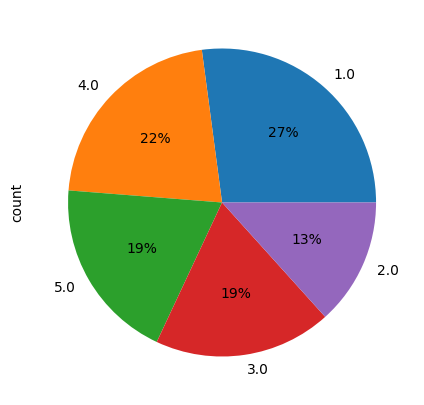

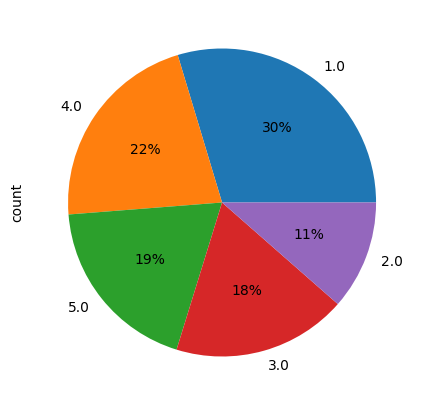

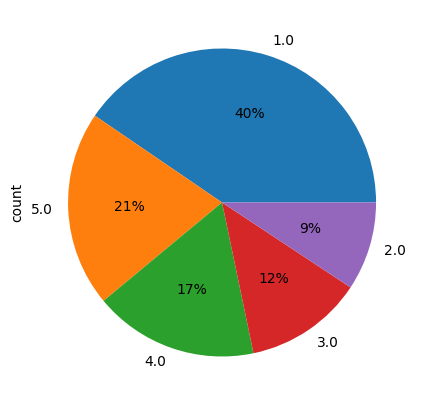

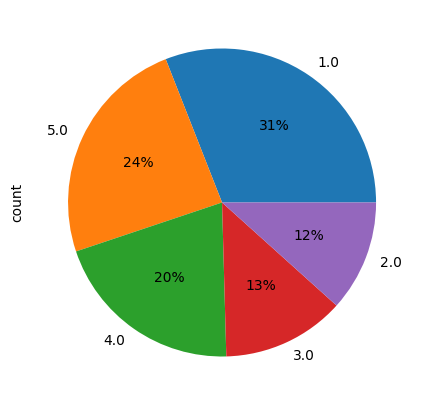

In [ ]:

# Get the percentage distribution of passengers with different ratings for numerical features
for col in ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']:
  fig = plt.figure(figsize=(10, 5))
  df[col].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [ ]:
num_df=df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

#filling null values with KNN IMPUTER
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5) #n_neighbours defines no of datapoints include closer to the missing values
num_df=pd.DataFrame(imputer.fit_transform(num_df),columns=num_df.columns)

In [ ]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          61183 non-null  float64
 1   seat_comfort     61183 non-null  float64
 2   cabin_service    61183 non-null  float64
 3   food_bev         61183 non-null  float64
 4   entertainment    61183 non-null  float64
 5   ground_service   61183 non-null  float64
 6   value_for_money  61183 non-null  float64
dtypes: float64(7)
memory usage: 3.3 MB


In [ ]:
df = df.drop(columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61183 entries, 1 to 131894
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   author           61183 non-null  object        
 2   review_date      61183 non-null  object        
 3   customer_review  61183 non-null  object        
 4   aircraft         18488 non-null  object        
 5   traveller_type   37540 non-null  object        
 6   cabin            58705 non-null  object        
 7   route            37513 non-null  object        
 8   date_flown       37434 non-null  datetime64[ns]
 9   recommended      59761 non-null  object        
 10  travel_month     37434 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 5.6+ MB


In [ ]:
df2=pd.concat([df.reset_index(),num_df.reset_index()],axis=1)
df2.info()
df2 = round(df2.select_dtypes(include=['object','float64']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            61183 non-null  int64         
 1   airline          61183 non-null  object        
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  object        
 4   customer_review  61183 non-null  object        
 5   aircraft         18488 non-null  object        
 6   traveller_type   37540 non-null  object        
 7   cabin            58705 non-null  object        
 8   route            37513 non-null  object        
 9   date_flown       37434 non-null  datetime64[ns]
 10  recommended      59761 non-null  object        
 11  travel_month     37434 non-null  float64       
 12  index            61183 non-null  int64         
 13  overall          61183 non-null  float64       
 14  seat_comfort     61183 non-null  float

In [ ]:
#replacing yes=1 and no=0 in recommended column
df2['recommended'].replace({'yes':1,'no':0},inplace=True)
num_df['recommended']=df2['recommended']
num_df.reset_index()
corr = num_df.corr()
corr.style.background_gradient(cmap='RdYlGn')



,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
overall,1.000000,0.792792,0.818956,0.806709,0.743332,0.884157,0.896169,0.898301
seat_comfort,0.792792,1.000000,0.708565,0.726556,0.710644,0.723109,0.758280,0.718894
cabin_service,0.818956,0.708565,1.000000,0.780438,0.669466,0.749089,0.764440,0.756471
food_bev,0.806709,0.726556,0.780438,1.000000,0.734490,0.719306,0.764912,0.739052
entertainment,0.743332,0.710644,0.669466,0.734490,1.000000,0.675799,0.708935,0.671324
ground_service,0.884157,0.723109,0.749089,0.719306,0.675799,1.000000,0.825326,0.802829
value_for_money,0.896169,0.758280,0.764440,0.764912,0.708935,0.825326,1.000000,0.837254
recommended,0.898301,0.718894,0.756471,0.739052,0.671324,0.802829,0.837254,1.000000


traveller_type


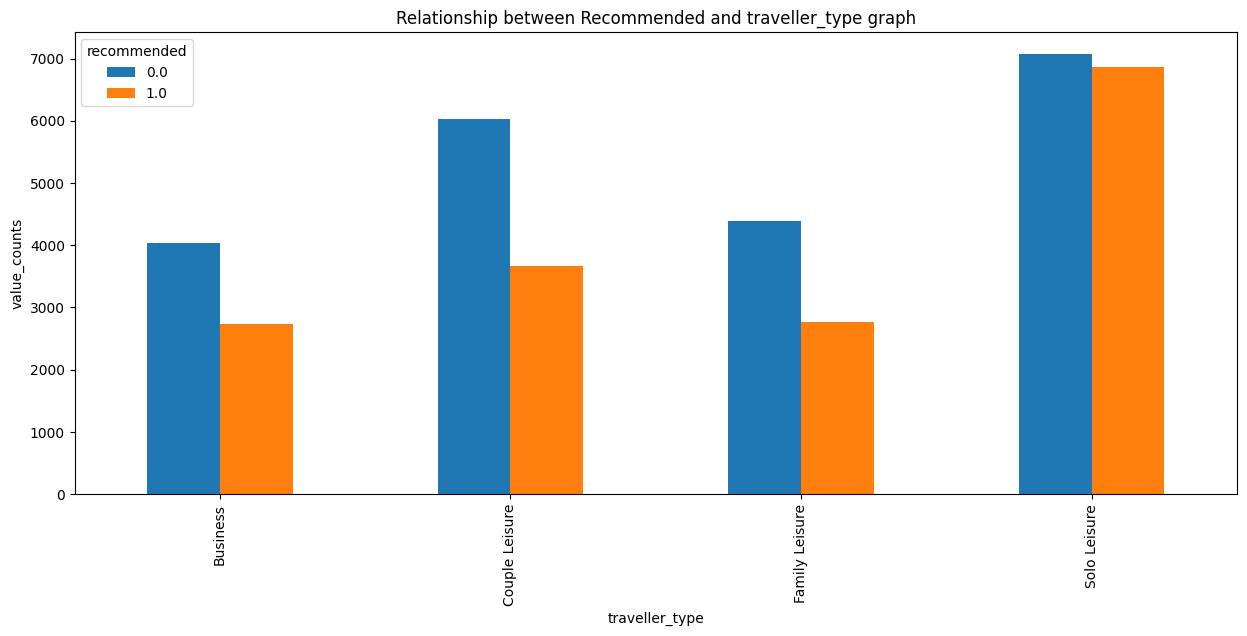

cabin


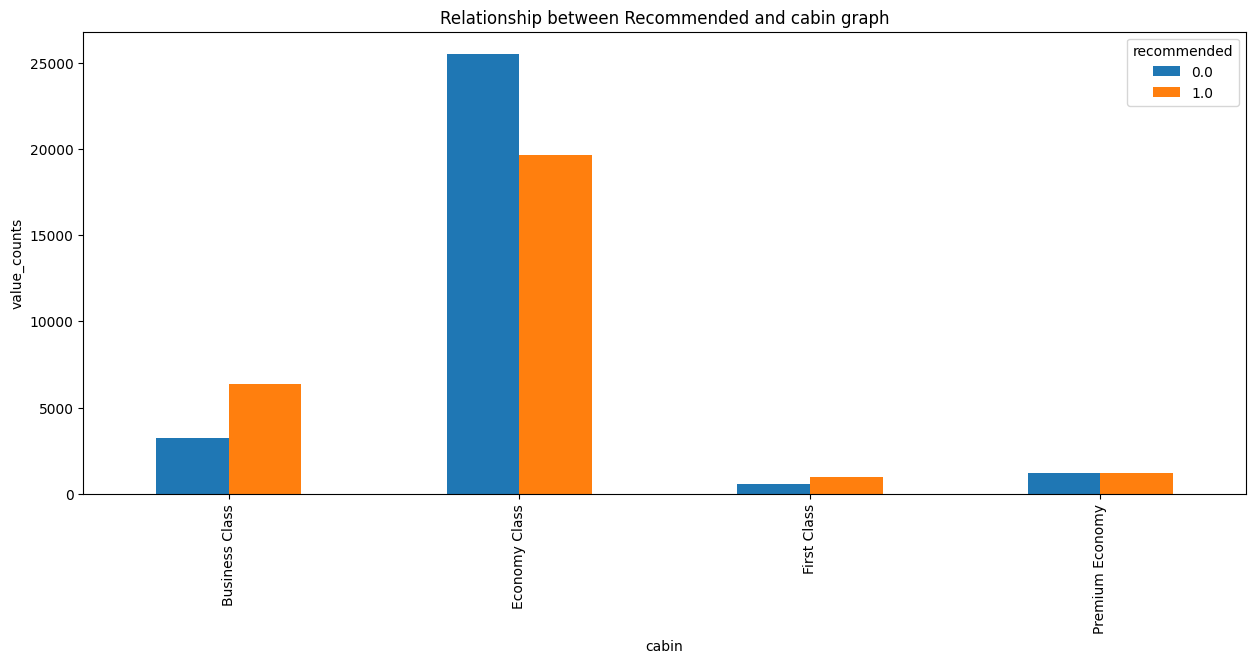

travel_month


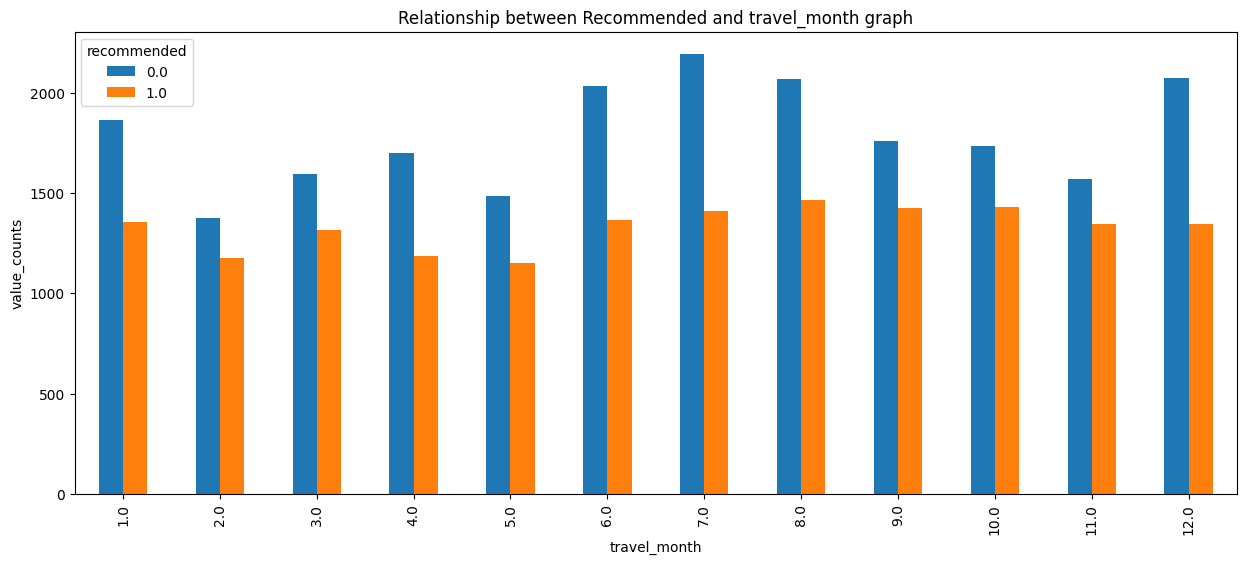

overall


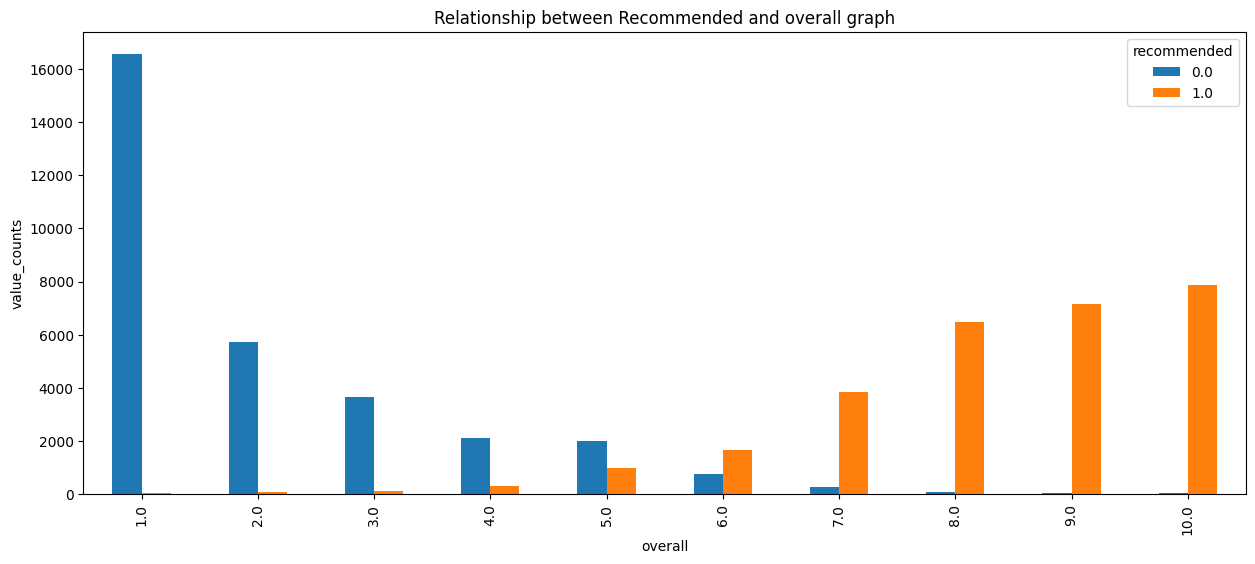

seat_comfort


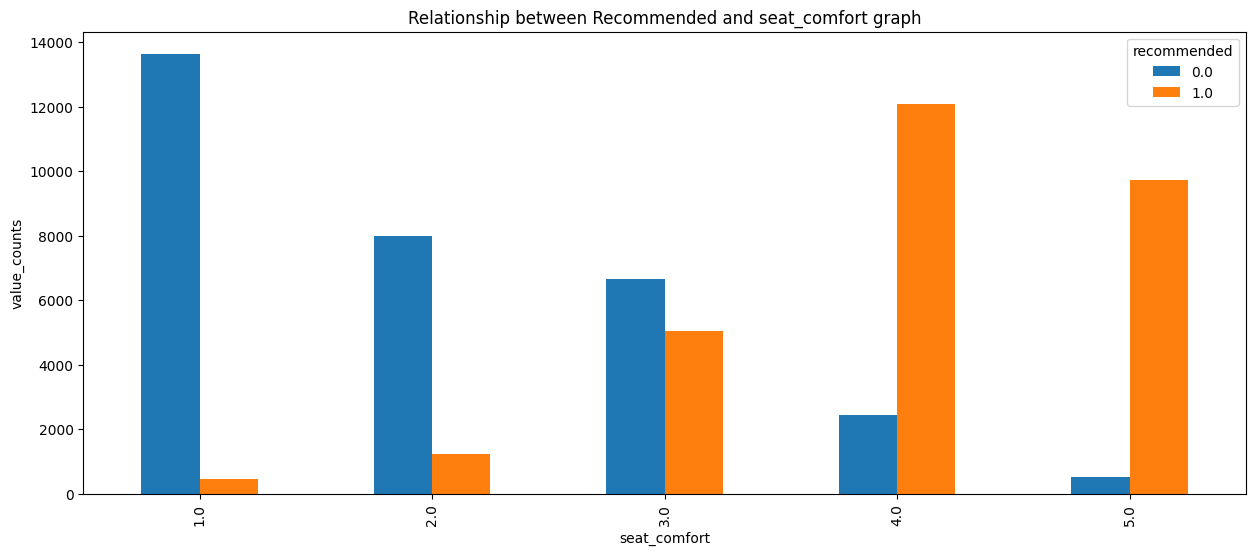

cabin_service


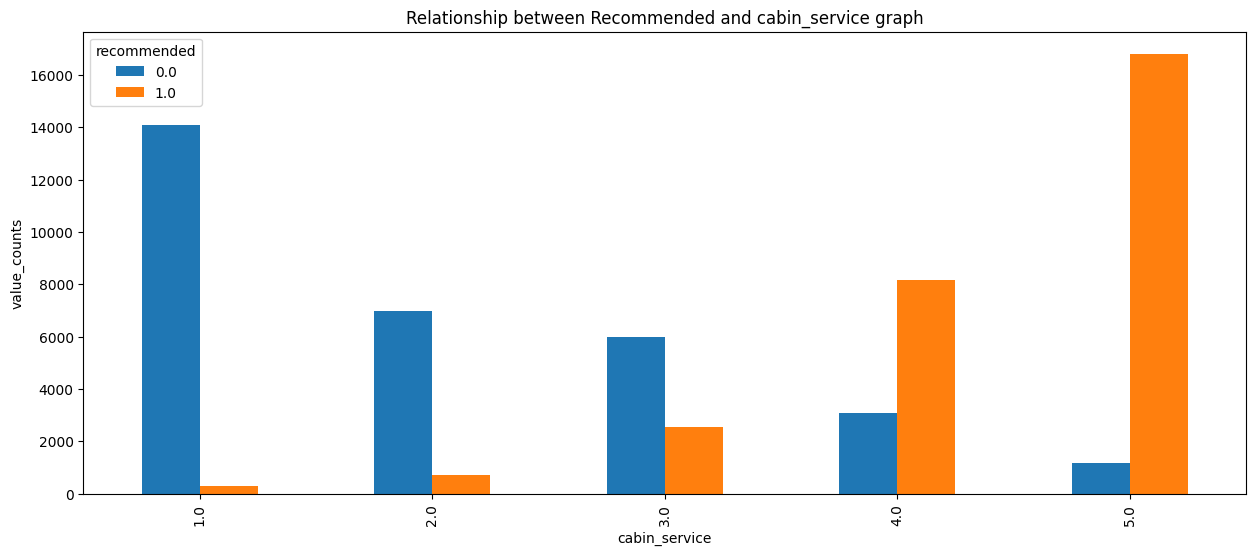

food_bev


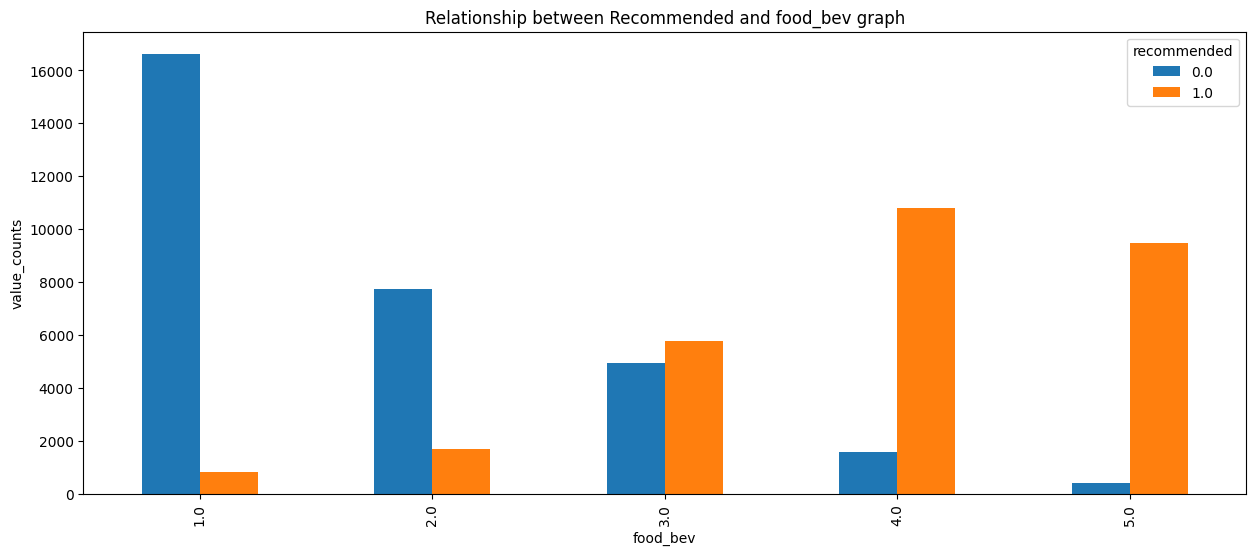

entertainment


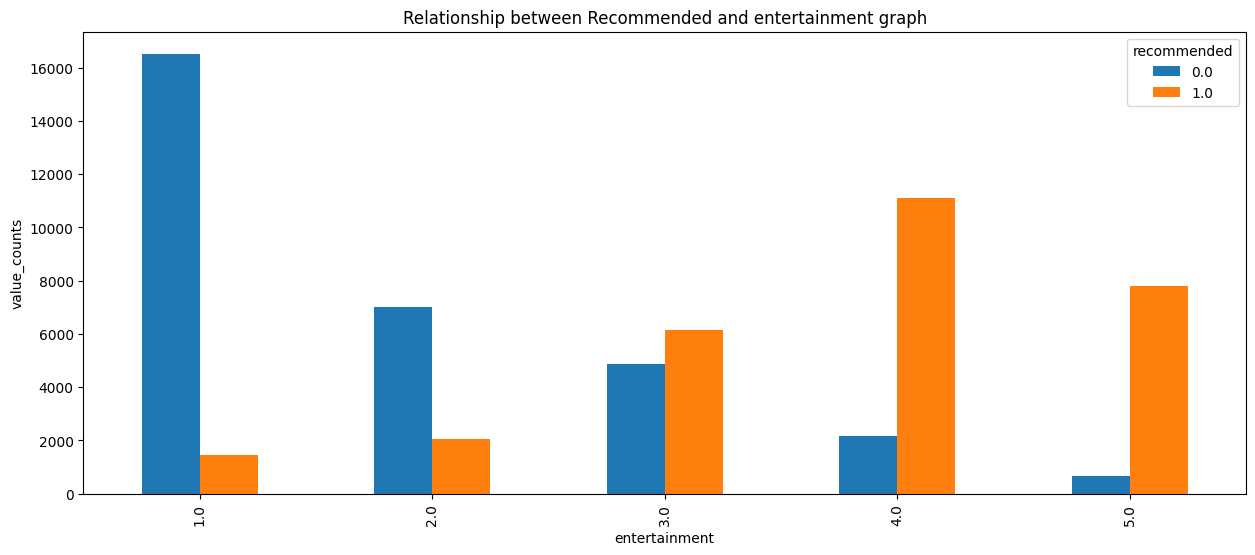

ground_service


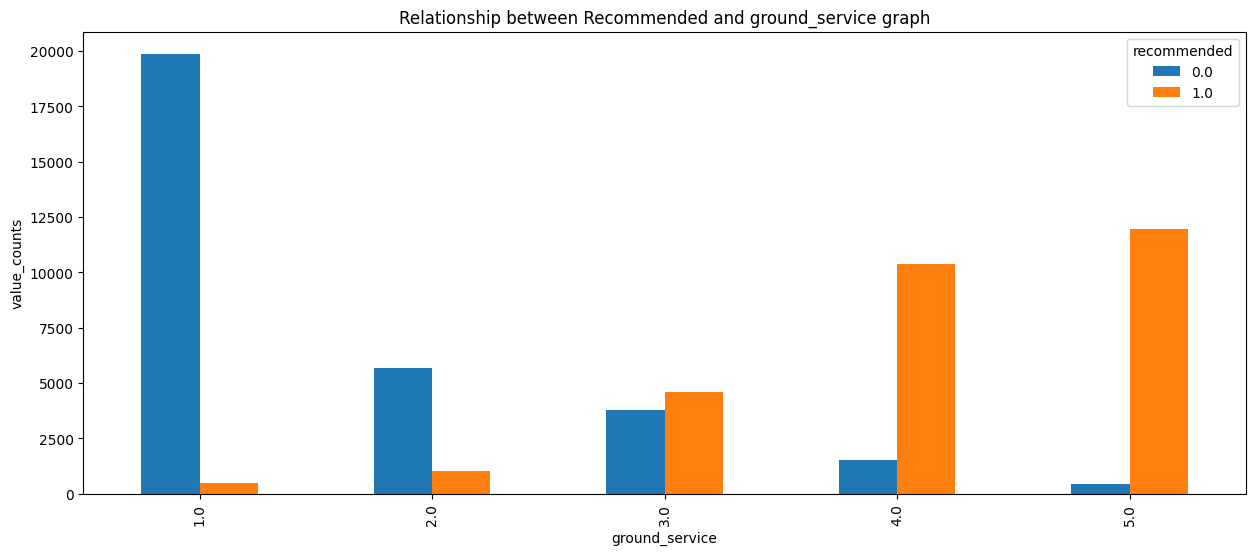

value_for_money


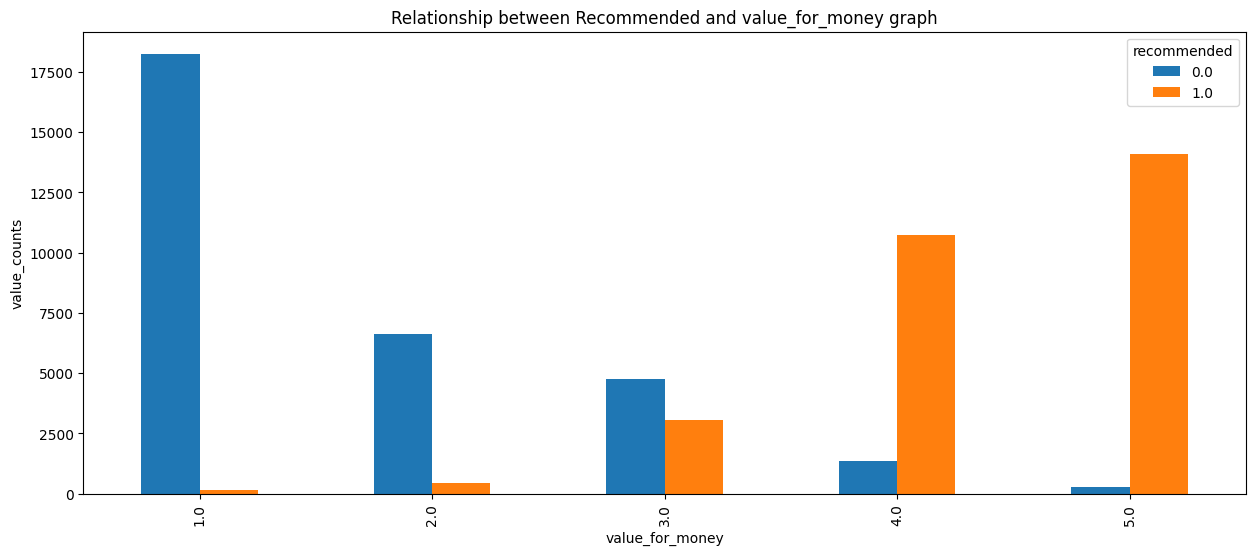

In [ ]:
#features present in dataset
features=df2.columns
features

features2= features.drop(['airline','author','aircraft','review_date', 'customer_review','route','recommended'])
#plotting graph of count of feature group by target variable
for i in features2:
  print(i)
  df2.groupby([i])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(15,6))
  plt.title(f"Relationship between Recommended and {i} graph")
  plt.xlabel(i)
  plt.ylabel("value_counts")
  plt.show()

In [ ]:
#checking the  null value if exist
df2.recommended.isna().sum()
#dropping redundant feature which are not required
df2.drop(['author','aircraft','review_date','route','travel_month'],axis=1,inplace=True)

In [ ]:
#notna() method returns a DataFrame object where all the values are replaced with a Boolean value True or False
df2 = df2[df2['recommended'].notna()]

#**NLP(Natural Language Processing) for reviews**




We have used vander sentiment in  NLP so to convert sentiments in  customer review into score so to  have our model prediction

In [ ]:
# Install vaderSentiment package
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
#Importing SentimentIntensity Analyzer Class
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#create function to get sentiment score for review
def sentiment_score(s):
  #create SentimentIntensityAnalyzer object
  sia_object=SentimentIntensityAnalyzer()
  #scoring each reviews depending on their polarity
  sentiment_dict=sia_object.polarity_scores(s)
  return sentiment_dict['compound']

In [ ]:
#creatic numeric review column to find and store the polarity of each customer review
df2['numeric_review']=df2['customer_review'].apply(sentiment_score)